In [1]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import numpy as np
import glob
import SimpleITK as sitk
from matplotlib import pyplot as plt


/Users/liliangbin/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
imgs = glob.glob("train"+ "//*." + "dcm")
print(len(imgs))

31


In [3]:
imgdatas = np.ndarray((len(imgs), 512, 512, 1), dtype=np.uint8)

image = sitk.ReadImage("train/20021.dcm")


------------------------------
Creating training images...
------------------------------
train/20021.dcm
(1, 512, 512)
(512, 512, 1)


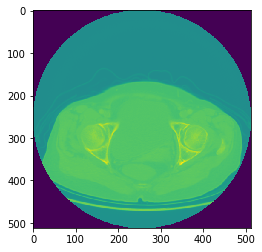

train/20009.dcm
(1, 512, 512)
(512, 512, 1)


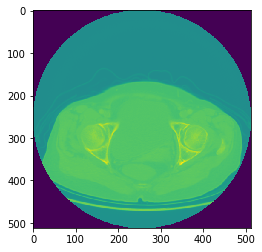

train/20008.dcm
(1, 512, 512)
(512, 512, 1)


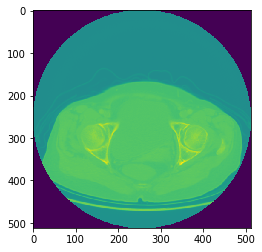

train/20020.dcm
(1, 512, 512)
(512, 512, 1)


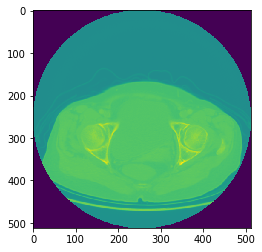

train/20022.dcm
(1, 512, 512)
(512, 512, 1)


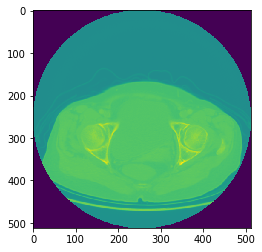

train/20023.dcm
(1, 512, 512)
(512, 512, 1)


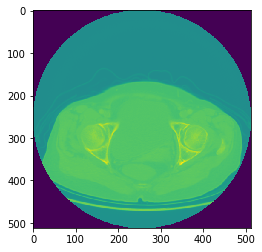

train/20027.dcm
(1, 512, 512)
(512, 512, 1)


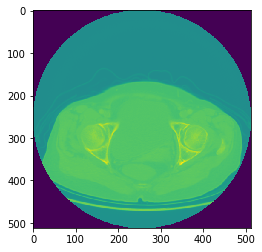

train/20026.dcm
(1, 512, 512)
(512, 512, 1)


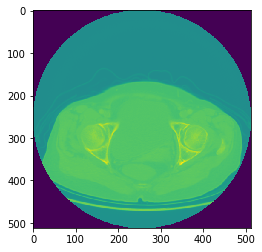

train/20018.dcm
(1, 512, 512)
(512, 512, 1)


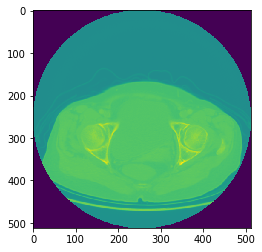

train/20024.dcm
(1, 512, 512)
(512, 512, 1)


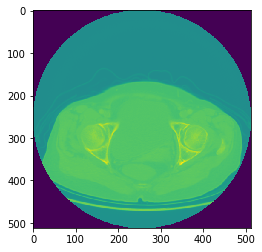

train/20030.dcm
(1, 512, 512)
(512, 512, 1)


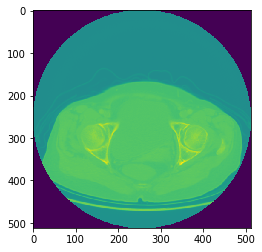

train/20031.dcm
(1, 512, 512)
(512, 512, 1)


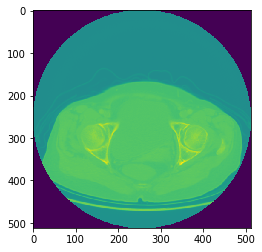

train/20025.dcm
(1, 512, 512)
(512, 512, 1)


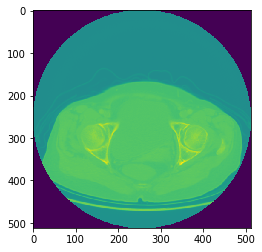

train/20019.dcm
(1, 512, 512)
(512, 512, 1)


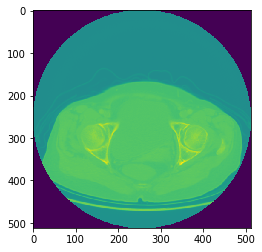

train/20014.dcm
(1, 512, 512)
(512, 512, 1)


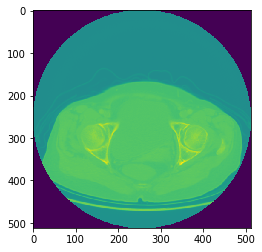

train/20028.dcm
(1, 512, 512)
(512, 512, 1)


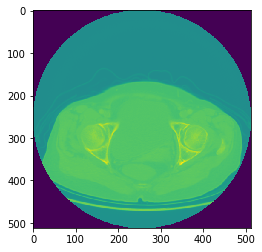

train/20029.dcm
(1, 512, 512)
(512, 512, 1)


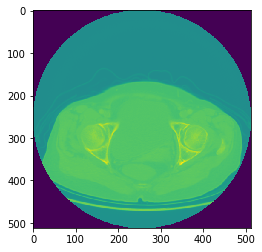

train/20015.dcm
(1, 512, 512)
(512, 512, 1)


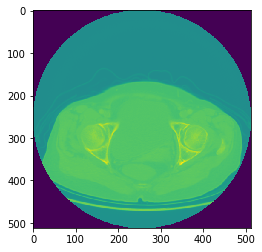

train/20001.dcm
(1, 512, 512)
(512, 512, 1)


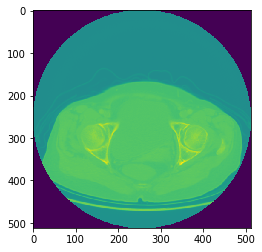

train/20017.dcm
(1, 512, 512)
(512, 512, 1)


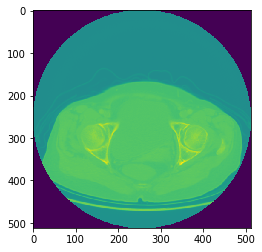

train/20003.dcm
(1, 512, 512)
(512, 512, 1)


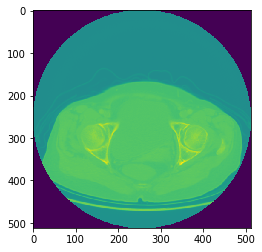

train/20002.dcm
(1, 512, 512)
(512, 512, 1)


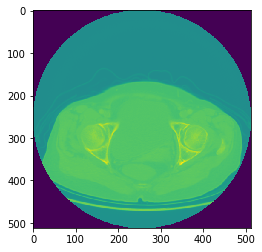

train/20016.dcm
(1, 512, 512)
(512, 512, 1)


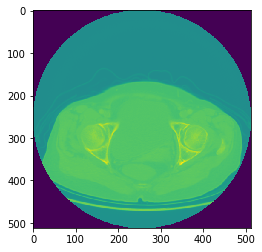

train/20012.dcm
(1, 512, 512)
(512, 512, 1)


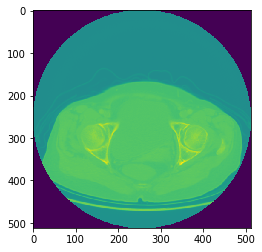

train/20006.dcm
(1, 512, 512)
(512, 512, 1)


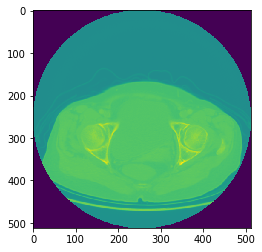

train/20007.dcm
(1, 512, 512)
(512, 512, 1)


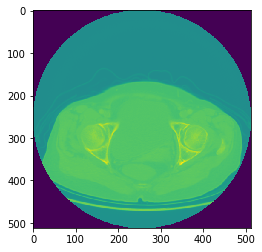

train/20013.dcm
(1, 512, 512)
(512, 512, 1)


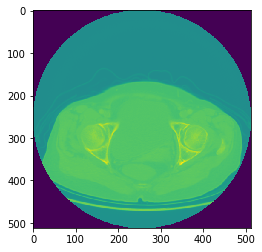

train/20005.dcm
(1, 512, 512)
(512, 512, 1)


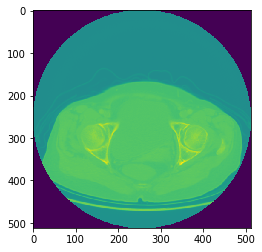

train/20011.dcm
(1, 512, 512)
(512, 512, 1)


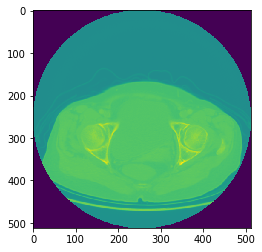

train/20010.dcm
(1, 512, 512)
(512, 512, 1)


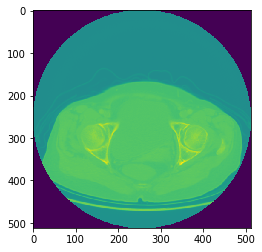

train/20004.dcm
(1, 512, 512)
(512, 512, 1)


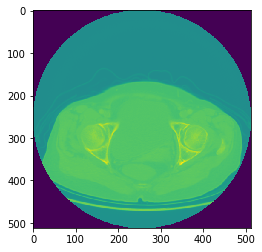

loading done


In [4]:
     
    # image = sitk.ReadImage("train/20021.dcm")
# image = sitk.ReadImage("train/20021.dcm")
# image_array = sitk.GetArrayFromImage(image) # z, y, x
# print(image_array.shape)
# images = np.squeeze(image_array) 
# plt.imshow(images)
# plt.show()
i=0
print('-'*30)
print('Creating training images...')
print('-'*30)

for imgname in imgs:

    print(imgname)
    midname = imgname[imgname.rindex("/") + 1:]
    img = sitk.ReadImage("train" + "/" + midname)
    image_array = sitk.GetArrayFromImage(image) # z, y, x
    print(image_array.shape)
    image_array = image_array.swapaxes(0,2)
    image_array = image_array.swapaxes(0,1)
    # 可以使用 transpose 
    # 维数变化
    print(image_array.shape)
    images = np.squeeze(image_array) 
    plt.imshow(images)
    plt.show()
    imgdatas[i] = image_array

    
print('loading done')


In [5]:
np.save('imgs_train.npy', imgdatas)
print('Saving to .npy files done.')


Saving to .npy files done.


In [8]:
imgs = glob.glob("train"+ "//*." + "png")
print(len(imgs))
imglabr = np.ndarray((len(imgs), 512, 512, 1), dtype=np.uint8)

i=0
print('-'*30)
print('Creating training images...')
print('-'*30)

for imgname in imgs:

    print(imgname)
    midname = imgname[imgname.rindex("/") + 1:]
    img = load_img("train" + "/" + midname,grayscale = True)
    img = img_to_array(img)
    label = img_to_array(img)
    imglabr[i]=label

    
print('loading done')

31
------------------------------
Creating training images...
------------------------------
train/20001_mask.png
train/20022_mask.png
train/20023_mask.png
train/20016_mask.png
train/20017_mask.png
train/20028_mask.png
train/20029_mask.png
train/20025_mask.png
train/20024_mask.png
train/20011_mask.png
train/20010_mask.png
train/20006_mask.png
train/20007_mask.png
train/20015_mask.png
train/20014_mask.png
train/20021_mask.png
train/20020_mask.png
train/20002_mask.png
train/20003_mask.png
train/20008_mask.png
train/20009_mask.png
train/20005_mask.png
train/20004_mask.png
train/20031_mask.png
train/20030_mask.png
train/20012_mask.png
train/20013_mask.png
train/20018_mask.png
train/20019_mask.png
train/20026_mask.png
train/20027_mask.png
loading done


/Users/liliangbin/anaconda3/lib/python3.6/site-packages/keras_preprocessing/image.py:489: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [9]:
np.save('imgs_mask_train.npy', imglabr)
print("imgs_mas_train.npy done ")


imgs_mas_train.npy done 
